<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P7E2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

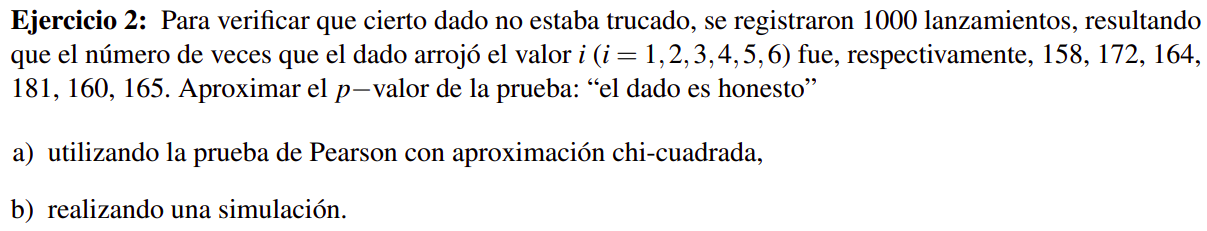

In [8]:
from scipy.stats import chi2
from random import random, seed
import numpy as np

# Datos del experimento
n_TAMANO_MUESTRA = 1000
VALORES = list(range(1, 7))
Ps = [1 / 6] * len(VALORES)
Ns_ORIGINAL = [158, 172, 164, 181, 160, 165]

# Estadístico Chi-cuadrado
def calcular_estadistico_chi2(frecuencias_obs, probabilidades, n):
    obs = np.asarray(frecuencias_obs)
    esperadas = n * np.asarray(probabilidades)
    return np.sum((obs - esperadas) ** 2 / esperadas)

# Cálculo del p-valor
k_grados_libertad = len(VALORES) - 1
t_estadistico_observado = calcular_estadistico_chi2(Ns_ORIGINAL, Ps, n_TAMANO_MUESTRA)
p_valor = chi2.sf(t_estadistico_observado, df=k_grados_libertad)

# Mostrar tabla
print(f"n = {n_TAMANO_MUESTRA}")
print(f"{'Valor':<10} {'Probabilidad':<15} {'Frecuencia':<10}")
print("-" * 40)
for valor, prob, frec in zip(VALORES, Ps, Ns_ORIGINAL):
    print(f"{valor:<10} {prob:<15.4f} {frec:<10}")
print()

# Resultado final
print(f"p-valor = P(chi²_{k_grados_libertad} ≥ {t_estadistico_observado:.4f}) = {p_valor:.4f}")

n = 1000
Valor      Probabilidad    Frecuencia
----------------------------------------
1          0.1667          158       
2          0.1667          172       
3          0.1667          164       
4          0.1667          181       
5          0.1667          160       
6          0.1667          165       

p-valor = P(chi²_5 ≥ 2.1800) = 0.8237


In [10]:
def muestreador_F(): # F = Dist H0
    return VALORES[int(random() * 6)]
    # u = random()
    # acc = 0
    # for valor, prob in zip(VALORES, Ps):
    #     acc += prob
    #     if u < acc:
    #         return valor

def estimar_Pvalor_conF(n_sim):
  t_mayores_que_t_original = 0
  for _ in range(n_sim):
    muestra = [muestreador_F() for _ in range(n_TAMANO_MUESTRA)]
    Ns_muestra = [muestra.count(x) for x in VALORES]
    t_muestra = calcular_estadistico_chi2(Ns_muestra, Ps, n_TAMANO_MUESTRA)
    if t_estadistico_observado < t_muestra:
      t_mayores_que_t_original += 1
  return t_mayores_que_t_original / n_sim

seed(1)
print(f"p-valor estimado = {estimar_Pvalor_conF(100_000)}")

p-valor estimado = 0.82366


In [13]:
def muestreador_binomial(n,p):
    razon_chances = p / (1 - p) # odds ratio
    prob = (1 - p) ** n # P(X=0)
    Fx = prob
    x = 0
    u = random() # U ~ Uniforme(0, 1)

    while u >= Fx:
        prob *= razon_chances * (n - x) / (x + 1)
        Fx += prob # F(x)
        x += 1

    return x

def generar_frecuencias():
    Ns = []
    anterior_Fv = 0 # F(anterior v)
    anterior_sum_Ns = 0
    for prob_v in Ps[:-1]:
        N_v = muestreador_binomial(n_TAMANO_MUESTRA - anterior_sum_Ns, prob_v / (1 - anterior_Fv))
        Ns.append(N_v)
        anterior_Fv += prob_v
        anterior_sum_Ns += N_v
    Ns.append(n_TAMANO_MUESTRA - anterior_sum_Ns)
    return Ns

def estimar_Pvalor_conFrec(n_sim):
  t_mayores_que_t_original = 0
  for _ in range(n_sim):
    Ns_muestra = generar_frecuencias()
    t_muestra = calcular_estadistico_chi2(Ns_muestra, Ps, n_TAMANO_MUESTRA)
    if t_estadistico_observado < t_muestra:
      t_mayores_que_t_original += 1
  return t_mayores_que_t_original / n_sim

seed(1)
print(f"p-valor estimado = {estimar_Pvalor_conFrec(100_000)}")

p-valor estimado = 0.82475


In [14]:
# test generacion de frecuencias
n_sim = 100_000
frec_muestras = [generar_frecuencias() for _ in range(n_sim)]
frec_muestra = [(v, sum([frecs[i] for frecs in frec_muestras]) / n_sim) for i, v in enumerate(VALORES)]
print(frec_muestra)
print(list(zip(VALORES, Ns_ORIGINAL)))

[(1, 166.67688), (2, 166.67757), (3, 166.70518), (4, 166.65242), (5, 166.63574), (6, 166.65221)]
[(1, 158), (2, 172), (3, 164), (4, 181), (5, 160), (6, 165)]
